In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
 

In [4]:



df = pd.read_csv(r"e:\dist\boston_house_prices_1_1.csv",header=[1])

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
x.shape,y.shape

((506, 13), (506,))

In [8]:
x = np.array(x)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score


In [10]:
# sns.pairplot(df)

In [11]:
esti = [('lr',LinearRegression()),('dt',DecisionTreeRegressor()),('svm',SVR())]

In [12]:
for m in esti:
    a = cross_val_score(m[1],x,y,cv=10,scoring='r2')
    print(m[0],np.round(np.mean(a),2))

lr 0.2
dt -0.21
svm -0.41


In [13]:
from sklearn.ensemble import VotingRegressor

In [14]:
a = VotingRegressor(esti)

In [15]:
cross_val_score(a,x,y,cv=10,scoring='r2').mean()

0.4437778842167317

In [16]:
nx = df[['LSTAT']]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

<Axes: ylabel='MEDV'>

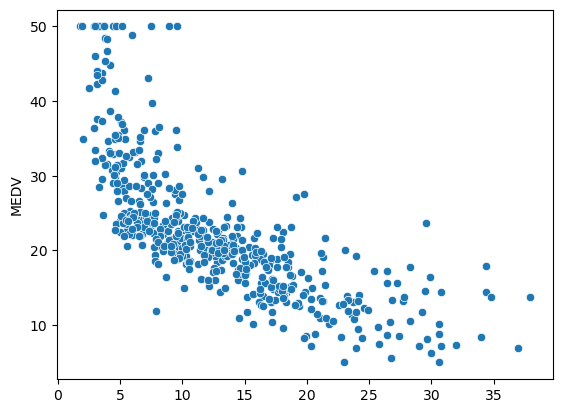

In [17]:
sns.scatterplot(x=np.array(nx).ravel(),y=y)

In [22]:
cross_val_score(a,nx,y,cv=10,scoring = 'r2').mean()

0.06124975297902705